# 0.0. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inflection
import math
import datetime
from IPython.core.display import HTML
from IPython.display import Image

## 0.1 Helper Functions

## 0.1 Loading Data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 1.0 Descriação dos Dados

## 1.1 Renomear Colunas

In [3]:
df1 = df_raw.copy()

In [4]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 
        'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

#rename
df1.columns = cols_new

## 1.2. Dimensão dos Dados

In [5]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 1017209
Number of Columns: 18


## 1.3 Tipos dos dados

In [6]:
# Alterar o tipo de dados para data
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Valores Nulos/Faltantes

In [7]:
df1.isna().sum()[df1.isna().sum()>0].sort_values(ascending=False)

promo_interval                  508031
promo2_since_year               508031
promo2_since_week               508031
competition_open_since_year     323348
competition_open_since_month    323348
competition_distance              2642
dtype: int64

In [8]:
na = df1.isna().sum()[df1.isna().sum()>0].sort_values(ascending=False).index.tolist()
na

['promo_interval',
 'promo2_since_year',
 'promo2_since_week',
 'competition_open_since_year',
 'competition_open_since_month',
 'competition_distance']

## 1.5 Imputação dos dados faltantes

In [9]:
# Levantar hipóteses sobre as razões dos NAs


# 'competition_open_since_year',
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# 'competition_open_since_month',

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# 'competition_distance' --> Muito distante a ponto de não ser encarada como competição 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x:200000 if math.isnan(x)else x)

# 'promo2_since_year',
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

# 'promo2_since_week',
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

# 'promo_interval',

month_map = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df1.fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

## 1.6 Alterando os tipos de dados

In [10]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [11]:
# De float para int
df1.competition_open_since_month = df1.competition_open_since_month.astype(int)
df1.competition_open_since_year = df1.competition_open_since_year.astype(int)
df1.promo2_since_week = df1.promo2_since_week.astype(int)
df1.promo2_since_year = df1.promo2_since_year.astype(int)

## 1.7 Estatística Descritiva

Tipos de métricas: 
* Tendência central: resumo dos dados em um único escalar 
    * Média e Mediana

* Dispensão: concentração ou dispersão em torno das medidas de tendência central 
    * Desvio Padrão
    * Skew: desformação/assimetria em relação à normal
    * Kurtosis: concentração dos dados em relação a determinado ponto
    * Mínimo, máximo e quartis

In [12]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [13]:
num = df1.select_dtypes(include=['int64','int32','float'])
cat = df1.select_dtypes(include=['object'])

### 1.7.1 Variáveis numéricas

In [14]:
#Tendência Central - média e mediana
ct1 = pd.DataFrame(num.apply(np.mean)).T
ct2 = pd.DataFrame(num.apply(np.median)).T

# Dispersão - min, max, range, skew, curtosis
d1 = pd.DataFrame(num.apply(np.std)).T
d2 = pd.DataFrame(num.apply(min)).T
d3 = pd.DataFrame(num.apply(max)).T
d4 = pd.DataFrame(num.apply(lambda x:x.max()-x.min())).T
d5 = pd.DataFrame(num.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num.apply(lambda x: x.kurtosis())).T

# Concatenar os dataframes
m = pd.concat([d2,d3,d4,ct1,ct2,d1, d5,d6]).T.reset_index()
columns = ['attributes','min','max','range', 'mean','median', 'std','skew','kurtosis']
m.head()

,index,0,0,0,0,0,0,0,0
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723


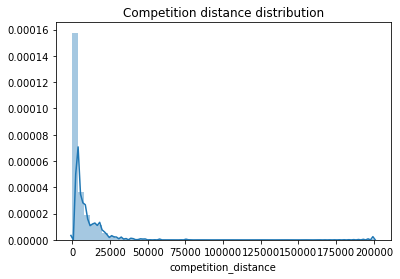

In [15]:
# Exemplo: há uma concentração muito grande de competidores nas proximidades das lojas
sns.distplot(df1['competition_distance']).set_title('Competition distance distribution');

### 1.7.2 Variáveis categóricas

In [16]:
cat.apply(lambda x:x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

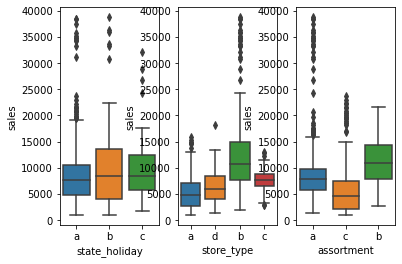

In [17]:
aux = df1[(df1['state_holiday'] != '0') & (df1['sales']>0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux);

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux);

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux);

# 2.0 Feature Engeneering

In [18]:
df2 = df1.copy()

## 2.1 Mapa Mental de Hipóteses

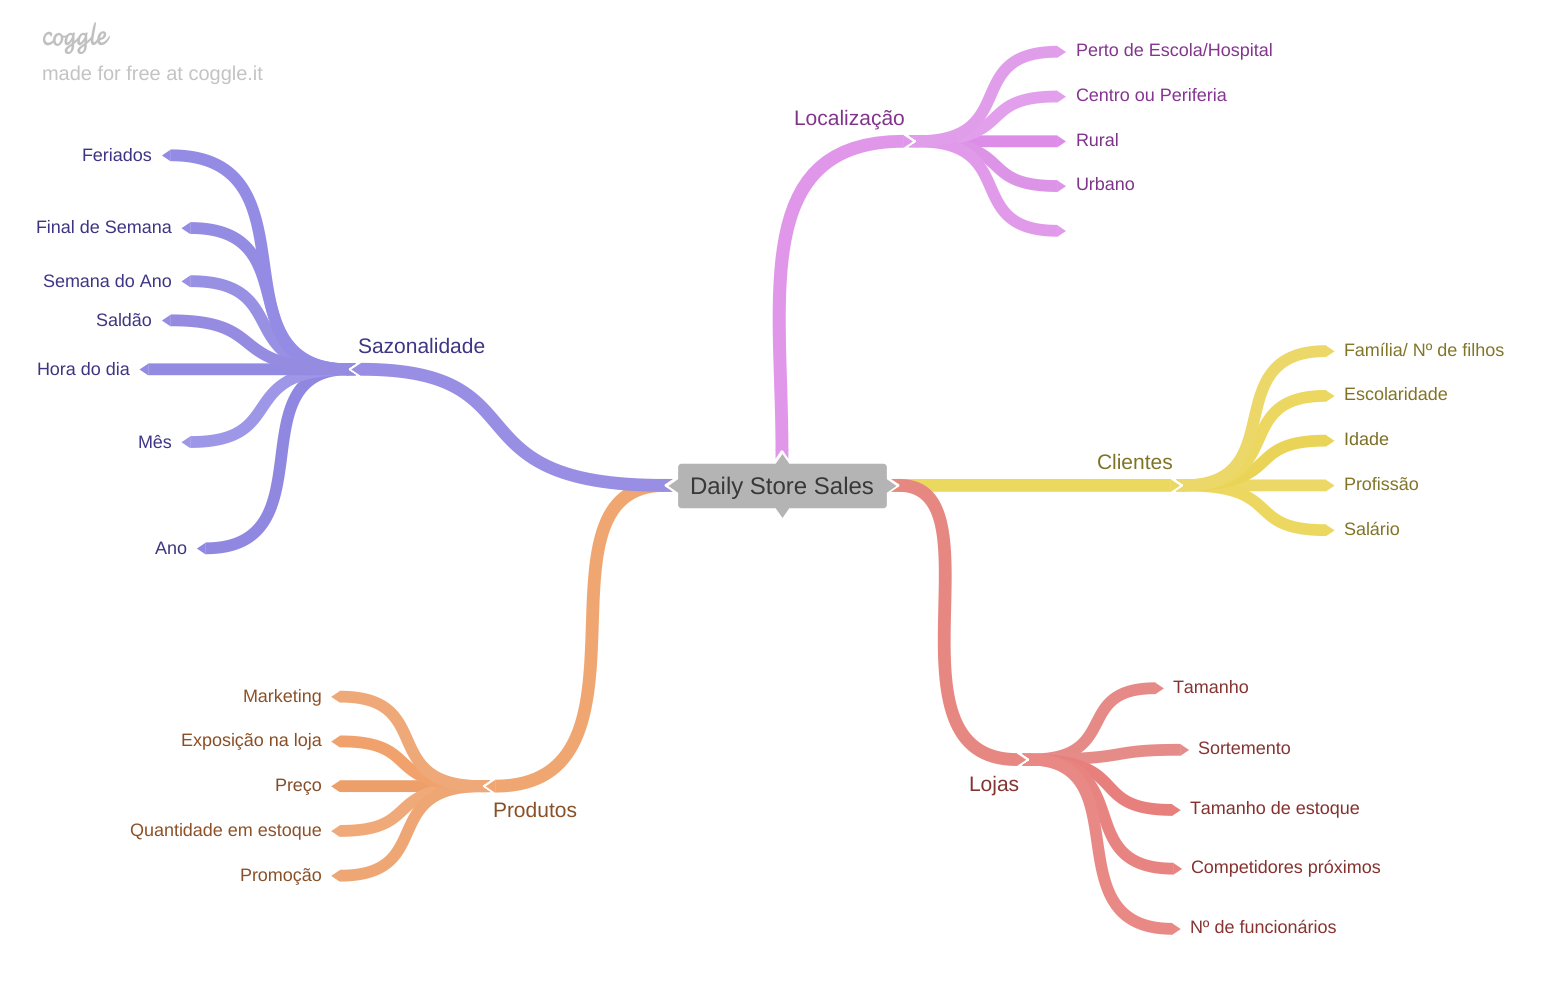

In [19]:
Image('Minfd_map.png')

## 2.2 Criação de Hipóteses

### 2.2.1 Hipóteses - Loja

1. Lojas com número maior de funcionários deveriam vender mais.

2. Lojas com maior capacidade de estoque deveriam vender mais.

3. Lojas com maior porte deveriam vender mais.

4. Lojas com maior sortimentos deveriam vender mais.

5. Lojas com competidores mais próximos deveriam vender menos.

6. Lojas com competidores à mais tempo deveriam vendem mais

### 2.2.2. Hipoteses - Produto

1. Lojas que investem mais em Marketing deveriam vender mais.

2. Lojas com maior exposição de produto deveriam vender mais.

3. Lojas com produtos com preço menor deveriam vender mais.

5. Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

6. Lojas com promoções ativas por mais tempo deveriam vender mais.

7. Lojas com mais dias de promoção deveriam vender mais.

8. Lojas com mais promoções consecutivas deveriam vender mais.


### 2.2.3. Hipoteses - Tempo¶


1. Lojas abertas durante o feriado de Natal deveriam vender mais.

2. Lojas deveriam vender mais ao longo dos anos.

3. Lojas deveriam vender mais no segundo semestre do ano.

4. Lojas deveriam vender mais depois do dia 10 de cada mês.

5. Lojas deveriam vender menos aos finais de semana.

6. Lojas deveriam vender menos durante os feriados escolares.


###  2.3. Lista Final de Hipóteses (baseada na disponibilidade de dados)

1. Lojas com maior sortimentos deveriam vender mais.

2. Lojas com competidores mais próximos deveriam vender menos.

3. Lojas com competidores à mais tempo deveriam vendem mais.

4. Lojas com promoções ativas por mais tempo deveriam vender mais.

5. Lojas com mais dias de promoção deveriam vender mais.

7. Lojas com mais promoções consecutivas deveriam vender mais.

8. Lojas abertas durante o feriado de Natal deveriam vender mais.

9. Lojas deveriam vender mais ao longo dos anos.

10. Lojas deveriam vender mais no segundo semestre do ano.

11. Lojas deveriam vender mais depois do dia 10 de cada mês.

12. Lojas deveriam vender menos aos finais de semana.

13. Lojas deveriam vender menos durante os feriados escolares.


## 2.3. Feature Engeneering

In [20]:
df2 = df2.copy()

In [21]:
# Year
df2['year'] =df2['date'].dt.year

# Month
df2['month'] =df2['date'].dt.month

# Day 
df2['day'] =df2['date'].dt.day

# Week of year
df2['week_of_year'] =df2['date'].dt.weekofyear

# Year week
df2['year_week'] =df2['date'].dt.strftime('%Y-%W')


# competition since
years = df1.loc[df1['competition_open_since_year']<1677, 'competition_open_since_year'].unique().tolist()
years_dic = {7:2007, 6:2006, 5:2005, 4:2004, 3:2003, 2:2002, 1:2001, 12:2012, 11:2011, 10:2010, 9:2009, 8:2008}
df2['competition_open_since_year'].replace(years_dic, inplace=True)
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

# assortment
df2['assortment'] = df2['assortment'].replace({'a':'basic', "b": 'extra', 'c':'extended'})

# state holiday
df2['state_holiday'] = df2['state_holiday'].replace({'a':'public holiday', 'b': 'Easter holiday', 'c':'Christmas', '0':'regular_day'})

# 3.0 Filtragem de variáveis

In [22]:
df3 = df2.copy()

In [23]:
# Filtrar open (apenas dias de loja aberta) e sales (apenas vendas acima de 0)
df3 = df3[(df3['open']!=0) & (df3['sales']>0)]

## 3.1. Filtragem das linhas

In [24]:
df3.drop(['customers','open', 'promo_interval', 'month_map'],axis=1, inplace=True)

In [25]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')